In [1]:
import csv
import os
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split

In [2]:
def parse_xml(xml_file, base):
    try:
        tree = ET.parse(xml_file)
    except ET.ParseError:
        print(f"Error parsing XML file: {xml_file}")
        return None

    root = tree.getroot()

    filename = root.find('filename').text
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    depth = int(root.find('size/depth').text)

    objects = []
    for obj in root.findall('object'):
        obj_name = base + " " + obj.find('name').text
        xmin = float(obj.find('bndbox/xmin').text)
        ymin = float(obj.find('bndbox/ymin').text)
        xmax = float(obj.find('bndbox/xmax').text)
        ymax = float(obj.find('bndbox/ymax').text)

        objects.append({
            'filename': filename,
            'disease': obj_name,
            'crop': base,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax,
            'ann_path': os.path.relpath(xml_file),
        })

    return filename, width, height, depth, objects


# Function to get the image file path based on filename
def get_image_path(row):
    # Construct the expected image filename
    image_filename = row['filename']

# Function to write extracted information to a CSV file


def write_to_csv(data_, csv_file_):
    with open(csv_file_, 'w', newline='') as csvfile:
        fieldnames = [
            'filename',
            'disease',
            'crop',
            'width',
            'height',
            'depth',
            'xmin',
            'ymin',
            'xmax',
            'ymax',
            'ann_path'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for row in data_:
            writer.writerow(row)

# Process folder


def process_folder(folder_path_, csv_file_):
    _data = []
    for root, dirs, files in os.walk(folder_path_):
        for xml_file in files:
            if xml_file.endswith('.xml'):
                xml_path = os.path.join(root, xml_file)
                try:
                    # Extract folder name from the path
                    file_path = os.path.dirname(xml_path)
                    # print(f"folder name { 'Corn' in str(folder_name)}")
                    # print(f"folder name {xml_path}")
                    # print(f"folder name {os.path.relpath(xml_path)}")

                    # Set base based on folder name
                    if 'Corn' in file_path:
                        base = 'Corn'
                    elif 'Pepper' in file_path:
                        base = 'Pepper'
                    elif 'Tomato' in file_path:
                        base = 'Tomato'
                    else:
                        base = "Unknown"

                    # print(base)

                    result = parse_xml(xml_path, base)
                    if result is not None:
                        filename, width, height, depth, objects = result

                        for obj in objects:
                            obj.update({
                                'width': width,
                                'height': height,
                                'depth': depth
                            })
                        _data.extend(objects)
                except Exception as e:
                    print(f"Error processing file: {xml_file} - {e}")

    write_to_csv(_data, csv_file_)

In [3]:
_path = './input'
csv_file = './data_labels.csv'

In [4]:
process_folder(_path, csv_file)

In [5]:
data = pd.read_csv(csv_file)
data.head(12)

,filename,disease,crop,width,height,depth,xmin,ymin,xmax,ymax,ann_path
0,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2052.653343,695.836619,2210.117161,785.809054,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
1,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1110.682288,901.086237,1228.780152,982.623756,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
2,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1647.746382,912.332791,1791.150930,1002.305226,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
3,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2491.302550,1275.034169,2589.717436,1367.818243,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
4,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,3326.423156,1255.352699,3410.778773,1339.701857,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
5,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,877.298415,1511.211811,1017.891110,1592.749330,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
6,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,534.252240,799.867247,643.914542,903.897875,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
7,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1847.388008,1595.560969,1948.614748,1677.098488,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
8,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,3185.830462,1072.596191,3256.126809,1165.380264,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...
9,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2170.751206,1204.743204,2288.849070,1303.150555,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...


In [6]:
# Replace the filename in the img_path with the filename column
data['img_path'] = data['ann_path'].str.replace('annotations', 'images')
data['img_path'] = data['img_path'].str.extract(r'^(.*?\\images)')[0]
data.head(12)

,filename,disease,crop,width,height,depth,xmin,ymin,xmax,ymax,ann_path,img_path
0,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2052.653343,695.836619,2210.117161,785.809054,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
1,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1110.682288,901.086237,1228.780152,982.623756,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
2,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1647.746382,912.332791,1791.150930,1002.305226,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
3,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2491.302550,1275.034169,2589.717436,1367.818243,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
4,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,3326.423156,1255.352699,3410.778773,1339.701857,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
5,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,877.298415,1511.211811,1017.891110,1592.749330,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
6,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,534.252240,799.867247,643.914542,903.897875,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
7,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1847.388008,1595.560969,1948.614748,1677.098488,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
8,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,3185.830462,1072.596191,3256.126809,1165.380264,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images
9,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2170.751206,1204.743204,2288.849070,1303.150555,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images


In [7]:
# Iterate through the DataFrame and add the string to the 'img_path' column
for index, row in data.iterrows():
    data.at[index, 'img_path'] = row['img_path'] + "\\" + row['filename']

In [8]:
data.head(12)

,filename,disease,crop,width,height,depth,xmin,ymin,xmax,ymax,ann_path,img_path
0,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2052.653343,695.836619,2210.117161,785.809054,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
1,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1110.682288,901.086237,1228.780152,982.623756,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
2,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1647.746382,912.332791,1791.150930,1002.305226,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
3,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2491.302550,1275.034169,2589.717436,1367.818243,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
4,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,3326.423156,1255.352699,3410.778773,1339.701857,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
5,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,877.298415,1511.211811,1017.891110,1592.749330,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
6,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,534.252240,799.867247,643.914542,903.897875,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
7,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1847.388008,1595.560969,1948.614748,1677.098488,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
8,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,3185.830462,1072.596191,3256.126809,1165.380264,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
9,20230524_104642.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2170.751206,1204.743204,2288.849070,1303.150555,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58691 entries, 0 to 58690
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  58691 non-null  object 
 1   disease   58691 non-null  object 
 2   crop      58691 non-null  object 
 3   width     58691 non-null  int64  
 4   height    58691 non-null  int64  
 5   depth     58691 non-null  int64  
 6   xmin      58691 non-null  float64
 7   ymin      58691 non-null  float64
 8   xmax      58691 non-null  float64
 9   ymax      58691 non-null  float64
 10  ann_path  58691 non-null  object 
 11  img_path  58691 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 5.4+ MB


In [10]:
data.sample(10)

,filename,disease,crop,width,height,depth,xmin,ymin,xmax,ymax,ann_path,img_path
34696,20230522_131226.jpg,Tomato Late Blight,Tomato,4080,3060,3,2217.327425,817.459382,2327.868470,1000.059463,input\Tomato\Tomato__Early_Blight\annotations\...,input\Tomato\Tomato__Early_Blight\images\20230...
57275,IMG_6378.jpeg,Tomato Septoria,Tomato,4032,3024,3,1027.962622,2050.853582,1320.775357,2229.508768,input\Tomato\Tomato__Septoria\annotations\IMG_...,input\Tomato\Tomato__Septoria\images\IMG_6378....
15004,2N8A1983.JPG,Corn Streak,Corn,1920,1280,3,830.180041,348.760288,1060.370370,545.514403,input\Corn\Corn__Streak\annotations\2N8A1983.xml,input\Corn\Corn__Streak\images\2N8A1983.JPG
10992,20230526_105933.jpg,Corn Healthy,Corn,4080,1836,3,1639.310820,1615.242439,1948.614748,1836.000000,input\Corn\Corn__Healthy\annotations\20230526_...,input\Corn\Corn__Healthy\images\20230526_10593...
14437,2N8A1757.JPG,Corn Cercospora Leaf Spot,Corn,1920,1280,3,1084.497930,1024.953416,1103.504141,1038.530021,input\Corn\Corn__Streak\annotations\2N8A1757.xml,input\Corn\Corn__Streak\images\2N8A1757.JPG
10976,20230526_105933(0).jpg,Corn Healthy,Corn,4080,1836,3,267.126120,1072.596191,559.558925,1443.732485,input\Corn\Corn__Healthy\annotations\20230526_...,input\Corn\Corn__Healthy\images\20230526_10593...
54597,2N8A0599.JPG,Tomato Septoria,Tomato,1920,1280,3,286.402692,942.919255,342.619048,1002.142857,input\Tomato\Tomato__Septoria\annotations\2N8A...,input\Tomato\Tomato__Septoria\images\2N8A0599.JPG
745,20230524_105726.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,1414.902177,190.828346,1655.694051,289.133858,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
5810,20230525_112418.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2317.987421,344.918187,2383.563941,413.340547,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
7898,20230526_113417.jpg,Corn Cercospora leaf spot,Corn,4080,1836,3,2417.777778,801.067255,2511.865828,872.340547,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...


In [11]:
data.columns

Index(['filename', 'disease', 'crop', 'width', 'height', 'depth', 'xmin',
       'ymin', 'xmax', 'ymax', 'ann_path', 'img_path'],
      dtype='object')

In [12]:
len(data['filename'].unique())

7081

In [13]:
data['disease'].unique()

array(['Corn Cercospora leaf spot', 'Corn Common Rust', 'Corn Healthy',
       'Corn Cercospora Leaf Spot', 'Corn Comon Rust', 'Corn Streak',
       'Corn Northern Leaf Blight', 'Pepper Leaf Curl',
       'Pepper Cercospora', 'Pepper Leaf Blight', 'Pepper Bacterial Spot',
       'Pepper Leaf Mosaic', 'Pepper Blurred', 'Pepper Healthy',
       'Pepper Fusarium', 'Pepper Unknown', 'Pepper Not pepper plant',
       'Pepper Not Pepper plant', 'Pepper Bacterial spot',
       'Pepper Leaf Mosoaic', 'Pepper Leaf Blight ', 'Pepper Septoria',
       'Pepper Late Blight', 'Pepper Early Blight', 'Pepper Fosarium',
       'Tomato Late Blight', 'Tomato Early Blight', 'Tomato Unknown',
       'Tomato Bacterial Spot', 'Tomato Septoria', 'Tomato Fosarium',
       'Tomato Leaf Curl', 'Tomato Healthy', 'Tomato Mosaic'],
      dtype=object)

In [15]:
data.shape

(58691, 12)

## There are 9 Columns and 58691 rows (bounding boxes)


In [16]:
# Filter out rows with 'Pepper Unknown' and 'Tomato Unknown' in the 'name' column
filtered_df = data[~data['disease'].isin(
    [
        'Pepper Not pepper plant',
        'Pepper Not Pepper plant',
        'Pepper Blurred',
        'Pepper Unknown',
        'Tomato Unknown'
    ]
)]

# # Correct the values in the 'name' column
filtered_df.loc[filtered_df['disease'] == 'Corn Comon Rust', 'disease'] = 'Corn Common Rust'
filtered_df.loc[filtered_df['disease'] == 'Corn Cercospora leaf spot', 'disease'] = 'Corn Cercospora Leaf Spot'
filtered_df.loc[filtered_df['disease'] == 'Corn Cercospora leaf spot', 'disease'] = 'Corn Cercospora Leaf Spot'
filtered_df.loc[filtered_df['disease'] == 'Pepper Leaf Blight ', 'disease'] = 'Pepper Leaf Blight'
filtered_df.loc[filtered_df['disease'] == 'Pepper Bacterial spot', 'disease'] = 'Pepper Bacterial Spot'
filtered_df.loc[filtered_df['disease'] == 'Pepper Leaf Mosoaic', 'disease'] = 'Pepper Leaf Mosaic'
filtered_df.loc[filtered_df['disease'] == 'Pepper Fosarium', 'disease'] = 'Pepper Fusarium'
filtered_df.loc[filtered_df['disease'] == 'Tomato Fosarium', 'disease'] = 'Tomato Fusarium'

In [19]:
filtered_df['disease'].unique()

array(['Corn Cercospora Leaf Spot', 'Corn Common Rust', 'Corn Healthy',
       'Corn Streak', 'Corn Northern Leaf Blight', 'Pepper Leaf Curl',
       'Pepper Cercospora', 'Pepper Leaf Blight', 'Pepper Bacterial Spot',
       'Pepper Leaf Mosaic', 'Pepper Healthy', 'Pepper Fusarium',
       'Pepper Septoria', 'Pepper Late Blight', 'Pepper Early Blight',
       'Tomato Late Blight', 'Tomato Early Blight',
       'Tomato Bacterial Spot', 'Tomato Septoria', 'Tomato Fusarium',
       'Tomato Leaf Curl', 'Tomato Healthy', 'Tomato Mosaic'],
      dtype=object)

In [20]:
len(filtered_df['disease'].unique())

23

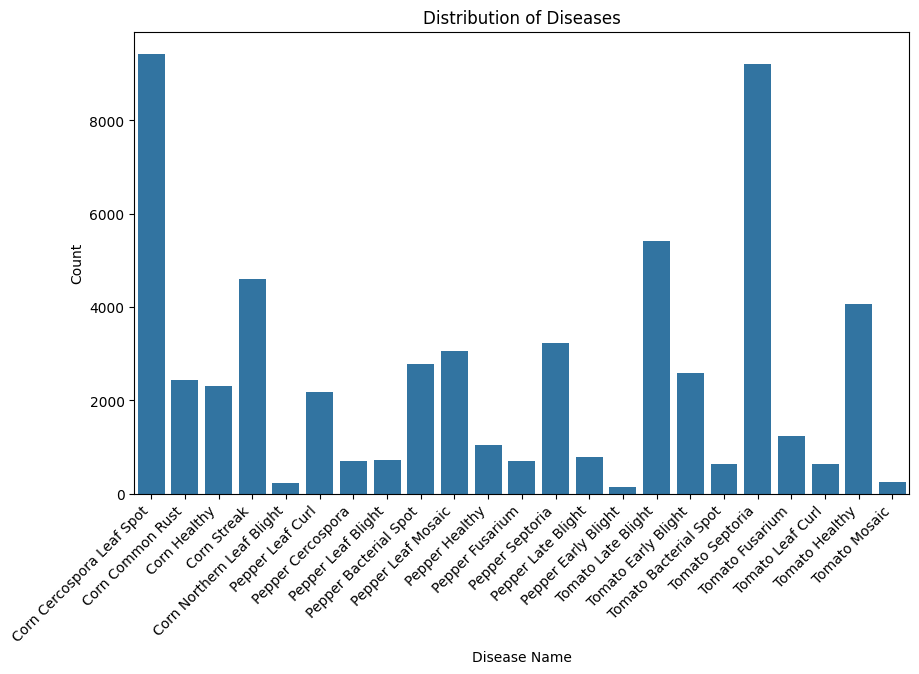

In [21]:
# Plot a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='disease', data=filtered_df)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Diseases')
plt.xlabel('Disease Name')
plt.ylabel('Count')

# Show the plot
plt.show()

In [22]:
filtered_df.to_csv("./input/dataset__labels.csv", index=False)

In [23]:
df = pd.read_csv('./input/dataset__labels.csv')
df.head()

,filename,disease,crop,width,height,depth,xmin,ymin,xmax,ymax,ann_path,img_path
0,20230524_104642.jpg,Corn Cercospora Leaf Spot,Corn,4080,1836,3,2052.653343,695.836619,2210.117161,785.809054,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
1,20230524_104642.jpg,Corn Cercospora Leaf Spot,Corn,4080,1836,3,1110.682288,901.086237,1228.780152,982.623756,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
2,20230524_104642.jpg,Corn Cercospora Leaf Spot,Corn,4080,1836,3,1647.746382,912.332791,1791.150930,1002.305226,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
3,20230524_104642.jpg,Corn Cercospora Leaf Spot,Corn,4080,1836,3,2491.302550,1275.034169,2589.717436,1367.818243,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...
4,20230524_104642.jpg,Corn Cercospora Leaf Spot,Corn,4080,1836,3,3326.423156,1255.352699,3410.778773,1339.701857,input\Corn\Corn__Cercospora_Leaf_Spot\annotati...,input\Corn\Corn__Cercospora_Leaf_Spot\images\2...


In [24]:
disease = df['disease'].unique()
print(disease)

['Corn Cercospora Leaf Spot' 'Corn Common Rust' 'Corn Healthy'
 'Corn Streak' 'Corn Northern Leaf Blight' 'Pepper Leaf Curl'
 'Pepper Cercospora' 'Pepper Leaf Blight' 'Pepper Bacterial Spot'
 'Pepper Leaf Mosaic' 'Pepper Healthy' 'Pepper Fusarium' 'Pepper Septoria'
 'Pepper Late Blight' 'Pepper Early Blight' 'Tomato Late Blight'
 'Tomato Early Blight' 'Tomato Bacterial Spot' 'Tomato Septoria'
 'Tomato Fusarium' 'Tomato Leaf Curl' 'Tomato Healthy' 'Tomato Mosaic']


In [25]:
def class_text_to_int(row_label, label_map):
    return label_map[row_label]

def create_label_map(disease_list):
    label_map = {}
    for index, disease in enumerate(disease_list):
        label_map[disease] = index + 1  # Start labels from 1
    return label_map

labels_map = create_label_map(disease)
labels_map

{'Corn Cercospora Leaf Spot': 1,
 'Corn Common Rust': 2,
 'Corn Healthy': 3,
 'Corn Streak': 4,
 'Corn Northern Leaf Blight': 5,
 'Pepper Leaf Curl': 6,
 'Pepper Cercospora': 7,
 'Pepper Leaf Blight': 8,
 'Pepper Bacterial Spot': 9,
 'Pepper Leaf Mosaic': 10,
 'Pepper Healthy': 11,
 'Pepper Fusarium': 12,
 'Pepper Septoria': 13,
 'Pepper Late Blight': 14,
 'Pepper Early Blight': 15,
 'Tomato Late Blight': 16,
 'Tomato Early Blight': 17,
 'Tomato Bacterial Spot': 18,
 'Tomato Septoria': 19,
 'Tomato Fusarium': 20,
 'Tomato Leaf Curl': 21,
 'Tomato Healthy': 22,
 'Tomato Mosaic': 23}

In [27]:
def save_label_map_to_json(label_map, output_dir):
    label_map_path = os.path.join(output_dir, 'label_map.json')
    with open(label_map_path, 'w') as label_map_file:
        json.dump(label_map, label_map_file)

save_label_map_to_json(labels_map, './input')

In [28]:
# Define the paths to your dataset and labels
data_dir = 'input'
label_map_path = 'input/label_map.json'  # JSON file for label mapping
csv_file = 'input/dataset__labels.csv'

# Define the ratios for train, test, and validation sets
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

In [29]:
dataset = pd.read_csv(csv_file)

In [30]:
# Split the dataset into train, test, and validation sets
train_data, temp_data = train_test_split(dataset, test_size=(1 - train_ratio))
test_data, val_data = train_test_split(temp_data, test_size=(val_ratio / (1 - train_ratio)))

In [31]:
train_data.head(12)

,filename,disease,crop,width,height,depth,xmin,ymin,xmax,ymax,ann_path,img_path
19124,2010-01-01%2000.16.04.jpg,Pepper Bacterial Spot,Pepper,1920,2560,3,869.232955,1194.494143,929.062500,1268.423855,input\Pepper\Pepper__Cercospora_Leaf_Spot\anno...,input\Pepper\Pepper__Cercospora_Leaf_Spot\imag...
50166,IMG_6195.jpeg,Tomato Septoria,Tomato,4032,3024,3,1742.649693,1231.266393,1888.520413,1339.764344,input\Tomato\Tomato__Late_Blight\annotations\I...,input\Tomato\Tomato__Late_Blight\images\IMG_61...
53856,IMG_6122.jpeg,Tomato Leaf Curl,Tomato,4032,3024,3,3571.640872,2490.520040,3677.181255,2684.633267,input\Tomato\Tomato__Leaf_curl\annotations\IMG...,input\Tomato\Tomato__Leaf_curl\images\IMG_6122...
45407,2N8A1390.JPG,Tomato Septoria,Tomato,1920,1280,3,934.508197,762.868852,1008.688525,847.500000,input\Tomato\Tomato__Late_Blight\annotations\2...,input\Tomato\Tomato__Late_Blight\images\2N8A13...
29804,20230522_111908.jpg,Pepper Leaf Mosaic,Pepper,4080,3060,3,237.475309,999.850696,525.189815,1187.781113,input\Pepper\Pepper__Mosaic\annotations\202305...,input\Pepper\Pepper__Mosaic\images\20230522_11...
46061,2N8A1527.JPG,Tomato Septoria,Tomato,1920,1280,3,745.688406,975.041408,806.801242,1024.948240,input\Tomato\Tomato__Late_Blight\annotations\2...,input\Tomato\Tomato__Late_Blight\images\2N8A15...
8834,20230525_111118.jpg,Corn Cercospora Leaf Spot,Corn,4080,1836,3,877.298415,1387.499713,978.525155,1477.472148,input\Corn\Corn__Common_Rust\annotations\20230...,input\Corn\Corn__Common_Rust\images\20230525_1...
36443,2N8A2430.JPG,Tomato Early Blight,Tomato,1920,1280,3,978.548116,729.293643,1045.614065,800.665994,input\Tomato\Tomato__Early_Blight\annotations\...,input\Tomato\Tomato__Early_Blight\images\2N8A2...
49955,IMG_6190.jpeg,Tomato Septoria,Tomato,4032,3024,3,2508.052678,1245.388832,2690.055751,1490.477459,input\Tomato\Tomato__Late_Blight\annotations\I...,input\Tomato\Tomato__Late_Blight\images\IMG_61...
34517,20230522_130715.jpg,Tomato Early Blight,Tomato,4080,3060,3,210.556743,2376.113487,358.999178,2556.347039,input\Tomato\Tomato__Early_Blight\annotations\...,input\Tomato\Tomato__Early_Blight\images\20230...


In [32]:
# save the train, test and validate split to seperate scv files
train_csv_path = 'input/train_data.csv'
test_csv_path = 'input/test_data.csv'
val_csv_path = 'input/val_data.csv'

train_data.to_csv(train_csv_path, index=False)
test_data.to_csv(test_csv_path, index=False)
val_data.to_csv(val_csv_path, index=False)